# DID THEFT INCREASE IN KITSILANO DURING THE PANDEMIC?

## INTRODUCTION

A study co-authored by Simon Fraser University researchers found that theft-related crimes increased in wealthier neighbourhoods, such as Kitsilano, during the pandemic (Andresen & Hodgkinson, 2022). They suspect this is related to the decrease in theft around downtown and surrounding neighbourhoods, as businesses closed down and employees started working from home. We will explore whether the proportion of theft crimes in Kitsilano increased during the pandemic. Our response variables would be the proportion of theft crimes in Kitsilano in 2018 and 2020. The location parameter would be the difference in proportions between the two years, while the scale parameter would be the standard deviation of that difference. We hypothesize an increase in theft crimes from 2018 to 2020.

We will use crime data from the Vancouver Police Department: https://geodash.vpd.ca/opendata/. Within the website, we're able to select a specific year and neighbourhood(s) to view data from. We selected crime data from all neighbourhoods during 2018 and 2020. Each tuple lists the type of crime, the date (across several columns), and the location it occurred. Theft-related crimes are classified as either "Theft of Vehicle", "Theft of Bicycle", "Theft from Vehicle", or "Other Theft" under the TYPE column. To find the proportions of theft crime in Kitsilano for a specific year, we'll first filter for all theft-related crimes in our dataset. Then, we find the number of theft crimes in Kitsilano by filtering NEIGHBOURHOOD=="Kitsilano", and divide that by the total number of theft crimes across all neighbourhoods that year. 

## METHODS AND RESULTS

### PRELIMINARY RESULTS

In [1]:
#Importing the libraries
library(tidyverse)
library(infer)
library(repr)
library(broom)
options(repr.plot.width=5, repr.plot.height=5)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#Reading the data from the web
#Data is uploaded on github
crimedata_all_2018 <- read_csv(url("https://raw.githubusercontent.com/Krithik1/STAT_201_PROJECT/main/data/crimedata_csv_AllNeighbourhoods_2018.csv"))
crimedata_all_2020 <- read_csv(url("https://raw.githubusercontent.com/Krithik1/STAT_201_PROJECT/main/data/crimedata_csv_AllNeighbourhoods_2020.csv"))


head(crimedata_all_2018)
head(crimedata_all_2020)

Rows: 44280 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 37516 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2018,6,16,18,0,10XX ALBERNI ST,West End,491102.2,5459092
Break and Enter Commercial,2018,12,12,0,0,10XX BEACH AVE,West End,490228.8,5458208
Break and Enter Commercial,2018,4,9,6,0,10XX BEACH AVE,Central Business District,490249.2,5458167
Break and Enter Commercial,2018,10,2,18,31,10XX BEACH AVE,Central Business District,490258.4,5458155
Break and Enter Commercial,2018,2,17,15,0,10XX BEACH AVE,Central Business District,490269.9,5458141
Break and Enter Commercial,2018,5,16,17,0,10XX BOUNDARY RD,Hastings-Sunrise,498275.6,5458125


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2020,6,19,3,40,10XX ALBERNI ST,West End,491059.5,5459122
Break and Enter Commercial,2020,1,3,6,43,10XX ALBERNI ST,West End,491068.7,5459126
Break and Enter Commercial,2020,9,27,20,0,10XX ALBERNI ST,West End,491073.1,5459109
Break and Enter Commercial,2020,6,28,6,50,10XX ALBERNI ST,West End,491102.2,5459092
Break and Enter Commercial,2020,2,5,0,0,10XX BEACH AVE,West End,490227.2,5458210
Break and Enter Commercial,2020,2,11,13,35,10XX BEACH AVE,West End,490227.2,5458210


### Cleaning the Data

In [3]:
# Removing the columns MONTH, DAY, HOUR, MINUTE, HUNDRED_BLOCK, X and Y

crimedata_all_2018 <- select(crimedata_all_2018, c(1,2,8))
crimedata_all_2020 <- select(crimedata_all_2020, c(1,2,8))

head(crimedata_all_2018)
head(crimedata_all_2020)

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Break and Enter Commercial,2018,West End
Break and Enter Commercial,2018,West End
Break and Enter Commercial,2018,Central Business District
Break and Enter Commercial,2018,Central Business District
Break and Enter Commercial,2018,Central Business District
Break and Enter Commercial,2018,Hastings-Sunrise


TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End


### Filtering the Data

In [4]:
# Extracting all theft-related crimes rows in the data set, which are Theft of Vehicle, Theft of Bicycle, Theft from Vehicle and Other Theft.

all_theft_2018 <- crimedata_all_2018 %>% filter(TYPE %in% c("Theft of Vehicle", "Theft of Bicycle", "Theft from Vehicle", "Other Theft"))
all_theft_2020 <- crimedata_all_2020 %>% filter(TYPE %in% c("Theft of Vehicle", "Theft of Bicycle", "Theft from Vehicle", "Other Theft"))
head(all_theft_2018)
nrow(all_theft_2018)
head(all_theft_2020)
nrow(all_theft_2020)

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Other Theft,2018,Central Business District
Other Theft,2018,Mount Pleasant
Other Theft,2018,West End
Other Theft,2018,West End
Other Theft,2018,West End
Other Theft,2018,West End


[1] 29561

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Other Theft,2020,West End
Other Theft,2020,West End
Other Theft,2020,West End
Other Theft,2020,West End
Other Theft,2020,West End
Other Theft,2020,West End


[1] 21915

In [5]:
# Extracting rows which are in "Kitsilano" neighborhood

kitsilano_all_theft_2018 <- all_theft_2018 %>% filter(NEIGHBOURHOOD == "Kitsilano")
head(kitsilano_all_theft_2018)
nrow(kitsilano_all_theft_2018)
kitsilano_all_theft_2020 <- all_theft_2020 %>% filter(NEIGHBOURHOOD == "Kitsilano")
head(kitsilano_all_theft_2020)
nrow(kitsilano_all_theft_2020)

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Other Theft,2018,Kitsilano
Other Theft,2018,Kitsilano
Other Theft,2018,Kitsilano
Other Theft,2018,Kitsilano
Other Theft,2018,Kitsilano
Other Theft,2018,Kitsilano


[1] 1393

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Other Theft,2020,Kitsilano
Other Theft,2020,Kitsilano
Other Theft,2020,Kitsilano
Other Theft,2020,Kitsilano
Other Theft,2020,Kitsilano
Other Theft,2020,Kitsilano


[1] 1135

In [6]:
#CALCULATING POPULATION PARAMETER
# p1: proportion of theft crimes in kitsilano in 2018
# p2: proportion of theft crimes in kitsilano in 2020
# p: difference in the proportions of theft crimes in Kitsilano in 2018 and 2020 (population parameter)

p1 <- nrow(kitsilano_all_theft_2018)/nrow(all_theft_2018)
p2 <- nrow(kitsilano_all_theft_2020)/nrow(all_theft_2020)
p <- p2-p1
p1
p2
p

[1] 0.0471229

[1] 0.05179101

[1] 0.004668112

In [7]:
# Creating table containing the proportions in both 2018 and 2020 and their difference (population)

pop_proportion_table <- tibble(p1 = p1, p2 = p2, p = p)

pop_proportion_table

p1,p2,p
<dbl>,<dbl>,<dbl>
0.0471229,0.05179101,0.004668112


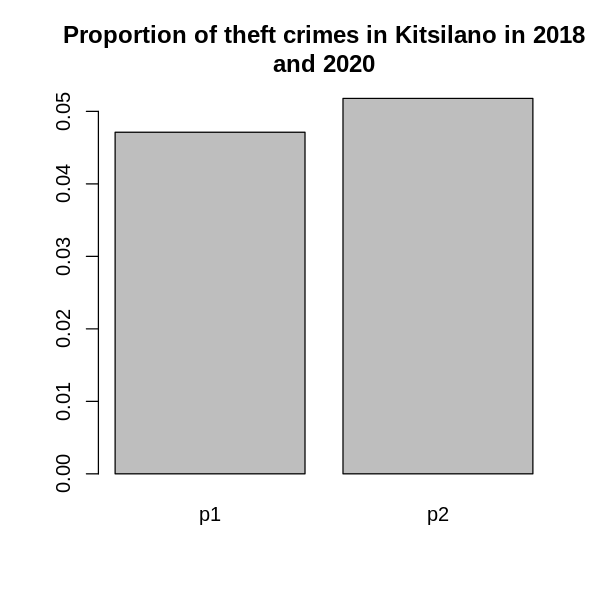

In [8]:
# Plotting the proportion of theft-related crimes in Kitsilano in both 2018 and 2020 using barplot (population)

barplot(c(p1, p2), main = "Proportion of theft crimes in Kitsilano in 2018\nand 2020", names.arg = c("p1", "p2"))

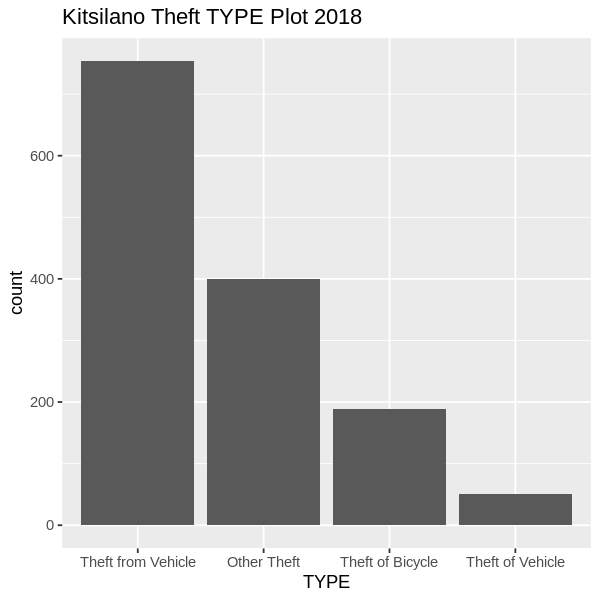

In [9]:
# Plotting the total number of crimes for each type of theft-related crimes in 2018

kitsilano_theft_plot_type_2018 <- kitsilano_all_theft_2018 %>%
        group_by(TYPE) %>%
        summarise(count = n()) %>%
        ggplot() +
        geom_bar(aes(x = reorder(TYPE, -count), y = count), stat = "identity") +
        xlab("TYPE") +
        ggtitle("Kitsilano Theft TYPE Plot 2018")

kitsilano_theft_plot_type_2018

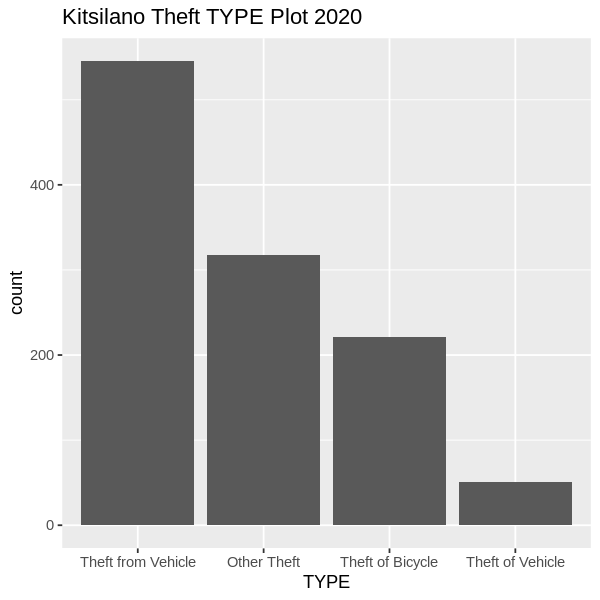

In [10]:
# Plotting the total number of crimes for each type of theft-related crimes in 2020

kitsilano_theft_plot_type_2020 <- kitsilano_all_theft_2020 %>%
        group_by(TYPE) %>%
        summarise(count = n()) %>%
        ggplot() +
        geom_bar(aes(x = reorder(TYPE, -count), y = count), stat = "identity") +
        xlab("TYPE") +
        ggtitle("Kitsilano Theft TYPE Plot 2020")

kitsilano_theft_plot_type_2020

In [11]:
# Taking samples of sample size 500 from both the datasets

set.seed(2)#Do not change
sample_size_both <- 500
all_theft_2018_sample <- rep_sample_n(all_theft_2018, size = sample_size_both)
all_theft_2020_sample <- rep_sample_n(all_theft_2020, size = sample_size_both)
head(all_theft_2018_sample)
head(all_theft_2020_sample)

replicate,TYPE,YEAR,NEIGHBOURHOOD
<int>,<chr>,<dbl>,<chr>
1,Theft from Vehicle,2018,Strathcona
1,Theft from Vehicle,2018,Central Business District
1,Other Theft,2018,Renfrew-Collingwood
1,Other Theft,2018,Central Business District
1,Theft of Vehicle,2018,Riley Park
1,Theft of Vehicle,2018,Renfrew-Collingwood


replicate,TYPE,YEAR,NEIGHBOURHOOD
<int>,<chr>,<dbl>,<chr>
1,Other Theft,2020,Central Business District
1,Other Theft,2020,Mount Pleasant
1,Theft of Bicycle,2020,Renfrew-Collingwood
1,Other Theft,2020,Central Business District
1,Other Theft,2020,Central Business District
1,Theft from Vehicle,2020,Riley Park


In [12]:
# Combining both samples into a single dataset and simplifying that dataset

both_samples <- rbind(all_theft_2018_sample, all_theft_2020_sample)%>%
ungroup() %>%
mutate(NEIGHBOURHOOD = ifelse((NEIGHBOURHOOD=="Kitsilano"),"Kitsilano","Other Neighbourhood")) %>%
mutate(YEAR = as.factor(YEAR)) %>%
select(-c(replicate, TYPE))

head(both_samples)

YEAR,NEIGHBOURHOOD
<fct>,<chr>
2018,Other Neighbourhood
2018,Other Neighbourhood
2018,Other Neighbourhood
2018,Other Neighbourhood
2018,Other Neighbourhood
2018,Other Neighbourhood


In [13]:
# Calculating sample proportions
# p1_hat: proportion of theft crimes in kitsilano in 2018 in sample
# p2_hat: proportion of theft crimes in kitsilano in 2020 in sample
# p: difference in proportion of theft crimes in kitsilano in 2018 and 2020 in sample

p1_hat <- nrow(filter(all_theft_2018_sample, NEIGHBOURHOOD == "Kitsilano"))/nrow(all_theft_2018_sample)
p2_hat <- nrow(filter(all_theft_2020_sample, NEIGHBOURHOOD == "Kitsilano"))/nrow(all_theft_2020_sample)
p_hat <- p2_hat-p1_hat

p1_hat
p2_hat
p_hat

[1] 0.05

[1] 0.068

[1] 0.018

In [14]:
# Creating table containing the proportions in samples for both 2018 and 2020 and their difference 

sample_proportion_table <- tibble(p1_hat = p1_hat, p2_hat = p2_hat, p_hat = p_hat)
sample_proportion_table

p1_hat,p2_hat,p_hat
<dbl>,<dbl>,<dbl>
0.05,0.068,0.018


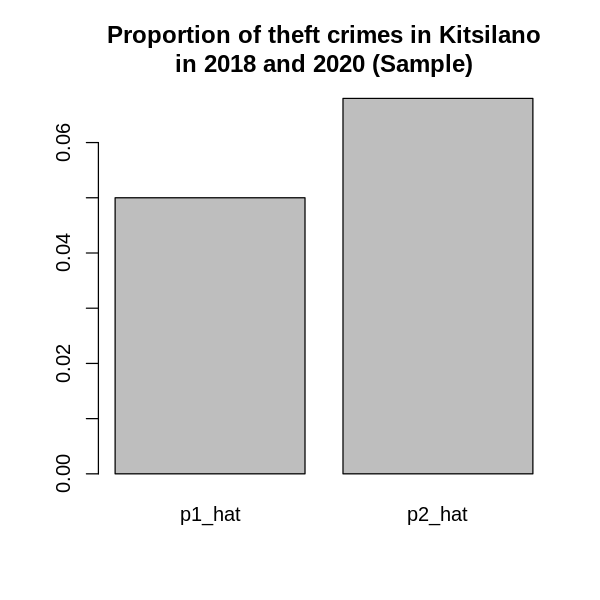

In [15]:
# Plotting the proportion of theft-related crimes in Kitsilano in samples for both 2018 and 2020 using barplot

barplot(c(p1_hat, p2_hat), main = "Proportion of theft crimes in Kitsilano\nin 2018 and 2020 (Sample)", names.arg = c("p1_hat", "p2_hat"))

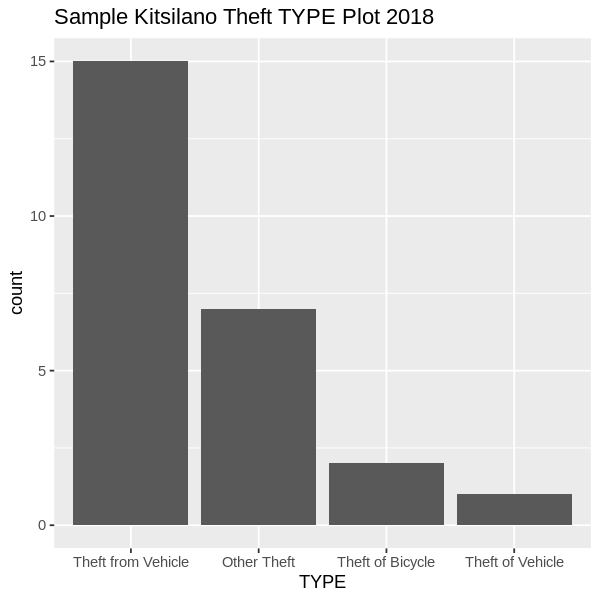

In [16]:
# Plotting the total number of crimes for each type of theft-related crimes in the 2018 sample

sample_kitsilano_theft_plot_type_2018 <- all_theft_2018_sample %>%
        filter(NEIGHBOURHOOD == "Kitsilano") %>%
        group_by(TYPE) %>%
        summarise(count = n()) %>%
        ggplot() +
        geom_bar(aes(x = reorder(TYPE, -count), y = count), stat = "identity") +
        xlab("TYPE") +
        ggtitle("Sample Kitsilano Theft TYPE Plot 2018")

sample_kitsilano_theft_plot_type_2018

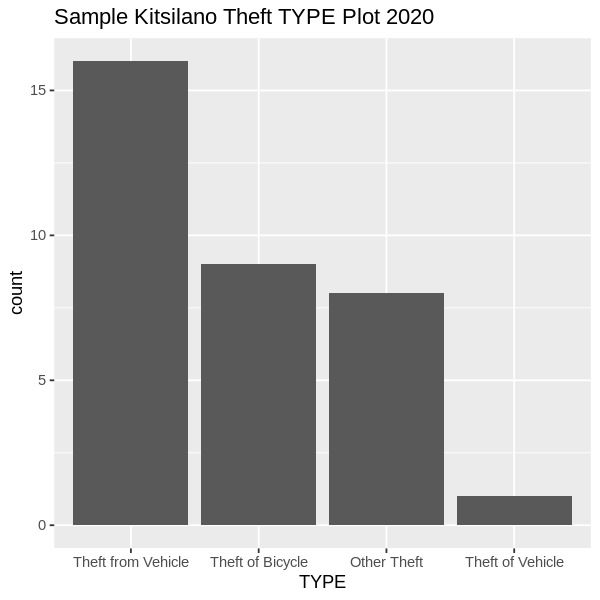

In [17]:
# Plotting the total number of crimes for each type of theft-related crimes in the 2020 sample

sample_kitsilano_theft_plot_type_2020 <- all_theft_2020_sample %>%
        filter(NEIGHBOURHOOD == "Kitsilano") %>%
        group_by(TYPE) %>%
        summarise(count = n()) %>%
        ggplot() +
        geom_bar(aes(x = reorder(TYPE, -count), y = count), stat = "identity") +
        xlab("TYPE") +
        ggtitle("Sample Kitsilano Theft TYPE Plot 2020")

sample_kitsilano_theft_plot_type_2020

### PLAN

Our report is trustworthy because we've sampled from the population in a random, unbiased fashion (using rep_sample_n). Our samples are sufficiently large (500 each) so they're representative of the population. We've also set the seed, making our report reproducible.
(Note: We'll pretend we don't have access to the entire population of crimes in Vancouver).

We see an increase of 0.018 (1.8%) in our sample proportion from 2018 to 2020. However, this increase could result from sampling variability and may not indicate a real difference in population proportion. Therefore, we want to verify whether this increase is statistically significant.

We intend to explore this using hypothesis testing. Since we have 2 samples from 2 independent populations (2018 and 2020), we'll use 2-sample z-testing (Krishnamoorthy & Thomson, 2002). We'll also construct a 90% confidence interval of the difference in proportions and check if it contains 0.

We'll use a significance level of 10% (rather than 5%) because we feel like a type 2 error would be worse than a type 1 error in our report.

As described above, we intend to use asymptotics for our analysis. However, if we get time, we will also use the bootstrapping method to validate our results.

#### Hypotheses:
Our null hypothesis would be that the difference in the population proportion between 2020 and 2018 is 0, while our alternative hypothesis would be that this difference is greater than 0.

H0: p2020-p2018 = 0

Ha: p2020-p2018 > 0

We'll use a right-tailed test.

#### REFLECTION:

1. We expect to reject the null hypothesis because the SFU study states an increase in theft within wealthy neighbourhoods like Kitsilano.

2. Such findings could help us understand theft rates in Kitsilano before and after the pandemic, leading to better theft prevention policies.

3. We could later explore the pandemic's impact on theft within poorer neighbourhoods, or explore a different type of crime.

4. A drawback of this study is that we cannot establish a causal relationship between the the commencement of the pandemic and the increase in the theft crimes since this is a retrospective observational study.

### CLT (Add justification in this block)

1. We use random sampling using rep_sample_n so both the samples are taken in a random and unbiased fashion

2. Both samples are independent of each other because they indicate thefts in Kitsilano in different years i.e. 2018 and 2020

3. Sample size (500) is large enough i.e (greater than 30)

4. We have 2 different populations i.e. Thefts in all neighbourhoods in 2018 and Thefts in all neighbourhoods in 2020

    Population Size for year 2018 = 29561
    
    Population Size for year 2020 = 21915
    
    Sample Size for year 2018 = 500
    
    Sample Size for year 2020 = 500
    
    Both samples have sample size less than 10% of the population. Thus, we can assume that the sampling has been done independently
    
5. Testing np $\geq$ 10 and n(1-p) $\geq$ 10

    Since, we have 2 independent populations we have to test the conditions for both of them
    
    Population 1: Year 2018
    
      n = 500
        
      p = 0.05
        
      np = 25 $\geq$ 10
        
      n(1-p) = 475 $\geq$ 10
        
    
    Population 2: Year 2020
    
      n = 500
        
      p = 0.068
        
      np = 34 $\geq$ 10
        
      n(1-p) = 466 $\geq$ 10

This means that we can use a normal approximation for the sampling distribution of the difference in sample proportions between 2020 and 2018

### THEORY BASED METHOD (2 sample z testing)

In [18]:
hypothesis_test <- tidy(
        prop.test(x = c(p2_hat * nrow(all_theft_2020_sample), p1_hat * nrow(all_theft_2018_sample)),
                  n = c(nrow(all_theft_2020_sample), nrow(all_theft_2018_sample)),
                  correct = FALSE,
                  alternative = "greater",
                  conf.level= 0.9))         

hypothesis_test


# ?prop.test

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.068,0.05,1.45896,0.1135478,1,-0.00108402,1,2-sample test for equality of proportions without continuity correction,greater


### INTREPRET RESULTS

### CONSTRUCT CI (THEORY BASED)

[1] 0.01490221

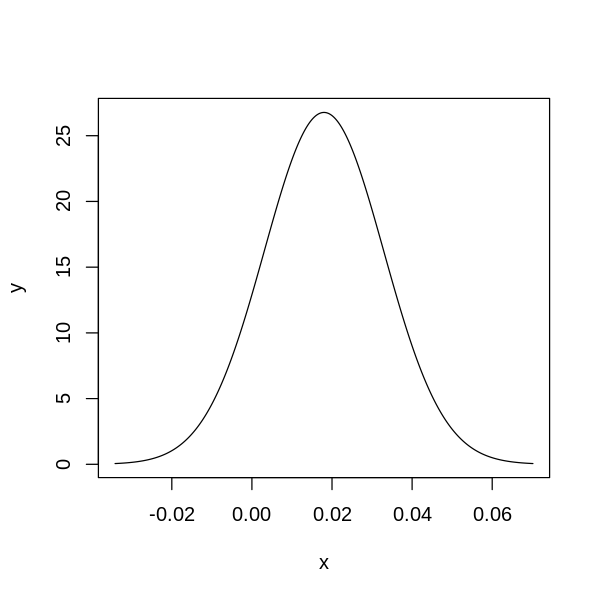

In [20]:
#define population mean and standard deviation
p_hat <- p2_hat-p1_hat
n1 <- 500
n2 <- 500
combined_p_hat <- (n1*p1_hat+n2*p2_hat)/(n1+n2)
theoretical_standard_error <- sqrt(combined_p_hat*(1-combined_p_hat)*(1/n1+1/n2))
theoretical_standard_error

x <- seq(p_hat-theoretical_standard_error*3.5, p_hat+theoretical_standard_error*3.5, length=1000)
y <- dnorm(x, mean=p_hat, sd=theoretical_standard_error)
plot(x, y, type="l", lwd=1)

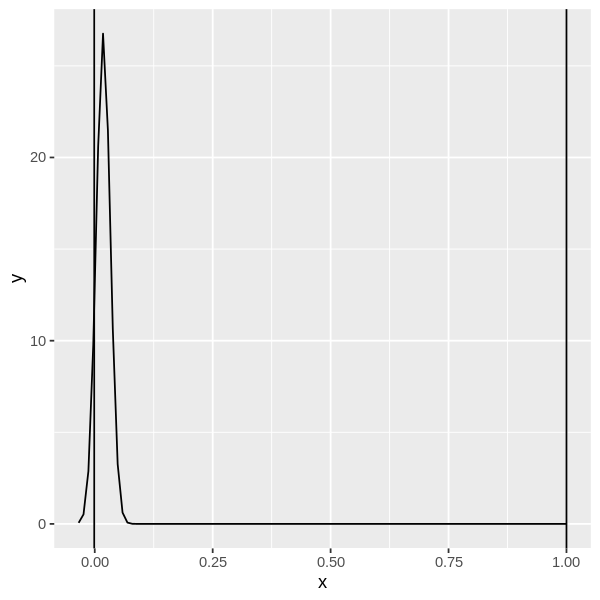

In [23]:
ggplot(data.frame(x = c(p_hat-theoretical_standard_error*3.5, p_hat+theoretical_standard_error*3.5)), aes(x = x)) +
        stat_function(fun = dnorm, args = list(mean = p_hat, sd = theoretical_standard_error)) +
        geom_vline(aes(xintercept = hypothesis_test$conf.low)) +
        geom_vline(aes(xintercept = hypothesis_test$conf.high))

### SIMULATION METHOD

lower_ci,upper_ci
<dbl>,<dbl>
-0.001203008,0.08567173


p_value
<dbl>
0.1165


replicate,stat
<int>,<dbl>
1,0.018370645
2,0.013292479
3,0.016919559
4,0.005388194
5,0.013388482
6,0.007424267


replicate,stat
<int>,<dbl>
1,0.0003706454
2,-0.0047075215
3,-0.0010804410
4,-0.0126118060
5,-0.0046115180
6,-0.0105757327


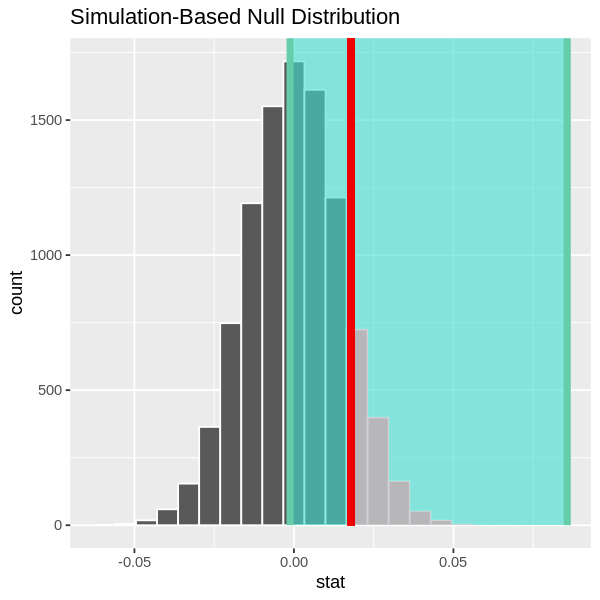

In [24]:
set.seed(2)

bootstrap_method <- both_samples %>%
specify(formula = NEIGHBOURHOOD ~ YEAR, success = "Kitsilano") %>%
hypothesize(null = "independence") %>%
generate(type = "bootstrap", reps =10000) %>%
calculate(stat = "diff in props", order = c("2020", "2018"))

ci<- bootstrap_method %>%
group_by()%>%
summarize(lower_ci = quantile(bootstrap_method$stat, 0.1), upper_ci = quantile(bootstrap_method$stat, 1))
ci

# obs_stat_val <- mean(bootstrap_method$stat)
obs_stat_val <- p_hat
shift <- p_hat

null_model <- bootstrap_method %>%
mutate(stat = stat - shift) 

null_model_plot <- null_model %>%
visualize(bins = 20) +
shade_ci(endpoints = ci) +
shade_p_value(obs_stat = obs_stat_val, direction = "right")
null_model_plot

null_model_p_value <- get_p_value(null_model, obs_stat = obs_stat_val, direction = "right")
null_model_p_value

# mean(null_model$stat)
head(bootstrap_method)
head(null_model)

### INTREPRET RESULTS

### CONSTRUCT CI (SIMULATION BASED) (PERCENTILE METHOD)

## DISCUSSION

### COMPARE RESULTS

## REFERENCES

- Krishnamoorthy, K., &amp; Thomson, J. (2002). Hypothesis testing about proportions in two finite populations. The American Statistician, 56(3), 215–222. https://doi.org/10.1198/000313002164 

- Andresen, M. A., &amp; Hodgkinson, T. (2022, January 9). In a world called catastrophe: The impact of covid-19 on neighbourhood level crime in Vancouver, Canada. Journal of experimental criminology. Retrieved November 4, 2022, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8742714/ 

- Data is from: VPD open data. (n.d.). Retrieved November 4, 2022, from https://geodash.vpd.ca/opendata/ 